# Задание 1

Примените PCA к данным MNIST.

Попробуйте со скалированием и без. Где надо меньше компонент при требовании 90% объясняемой дисперсии? (код визуализации ниже)

Обучите knn классификатор на исходных данных и на выбранных компонентах PCA (со скалированием и без). Сравните тестовый скор по метрике accuracy.

In [37]:
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


%matplotlib inline

In [38]:
digits = datasets.load_digits()
X, y = digits['data'], digits['target']

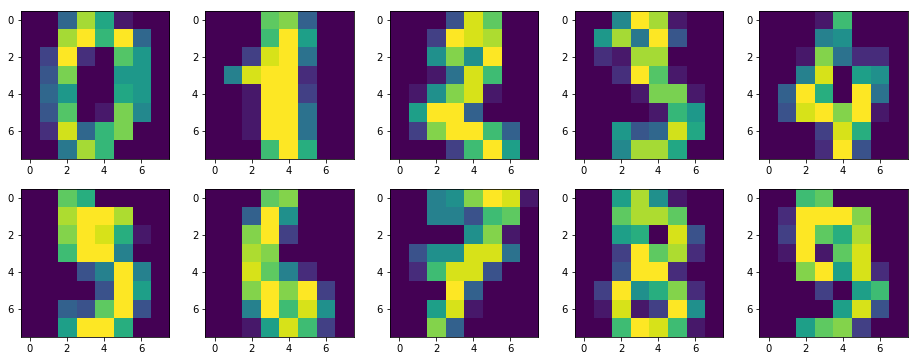

In [39]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

In [40]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

#ваш код здесь
scaleX = pd.DataFrame(X,copy=True)
for col in scaleX:
    ss = StandardScaler()
    scaleX[col] = ss.fit_transform(scaleX[[col]])


### Пример визуализации выбора кол-ва компонент

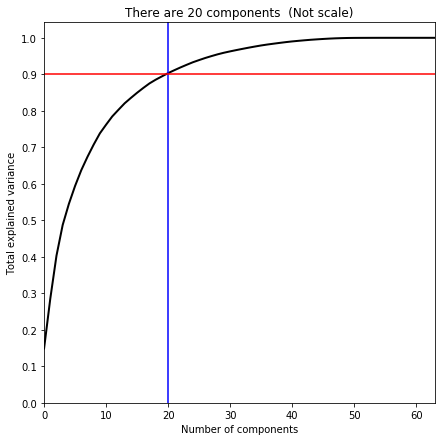

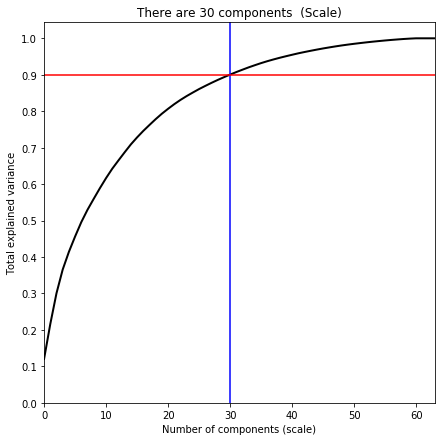

In [41]:
def find_comp(list_of_cumsum):
    for i in range(len(list_of_cumsum)):
        if list_of_cumsum[i] > 0.9:
            return i
        
pca = PCA().fit(X) #ваши данные

plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.title('There are {} components  (Not scale)'. format(find_comp(np.cumsum(pca.explained_variance_ratio_))))
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(find_comp(np.cumsum(pca.explained_variance_ratio_)), c='b')
plt.axhline(0.9, c='r')
plt.show();

pca_scale = PCA().fit(scaleX) #ваши данные

plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca_scale.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components (scale)')
plt.ylabel('Total explained variance')
plt.title('There are {} components  (Scale)'. format(find_comp(np.cumsum(pca_scale.explained_variance_ratio_))))
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(find_comp(np.cumsum(pca_scale.explained_variance_ratio_)), c='b')
plt.axhline(0.9, c='r')
plt.show();

In [93]:
# отбрасываем компоненты согласно данным полученным выше
X_reduce = X[:,44:] 
scaleX_reduce = scaleX.drop(columns=list(range(20, 64)))

print(scaleX_reduce[0])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1767    0.0
1768    0.0
1769    0.0
1770    0.0
1771    0.0
1772    0.0
1773    0.0
1774    0.0
1775    0.0
1776    0.0
1777    0.0
1778    0.0
1779    0.0
1780    0.0
1781    0.0
1782    0.0
1783    0.0
1784    0.0
1785    0.0
1786    0.0
1787    0.0
1788    0.0
1789    0.0
1790    0.0
1791    0.0
1792    0.0
1793    0.0
1794    0.0
1795    0.0
1796    0.0
Name: 0, Length: 1797, dtype: float64


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, scaleX_train,\
scaleX_test, y_train, y_test = train_test_split(X, scaleX, y, test_size=0.2, random_state=777)

base_clf = KNeighborsClassifier() # инициализируем базовый классификатор

params_grid = {
    'n_neighbors': list(range(1,30,2)), # Перебираем от 1 до 30 с шагом 2
    'weights': ['uniform', 'distance', lambda x: 1./x**2], # с каким весом берём каждого соседа. uniform - с одинаковым, distance - обратно пропорционально расстоянию. Ещё можно передать свою функцию
    'algorithm': ['auto'], # алгоритм поиска ближайших соседей. Влияет только на скорость обучения
    'leaf_size': [30], # параметры некоторых алгоритмов поиска ближ соседей. Влияет только на скорость обучения
    'metric': ['minkowski'], # метрика расстояния, используемая в алгоритме поиска ближайших соседей
    'p': [2] # параметр метрики, используемой в методе ближайших соседей 
}
gs = GridSearchCV(base_clf, params_grid, scoring='accuracy', cv=5) # cv - количество частей (K из рис. выше), verbose - выводить параметры во время обучения

gs.fit(scaleX_train, y_train)

clf = gs.best_estimator_
y_pred = clf.predict(X_test)

print('Best score: {}'.format(gs.best_score_))
print('Best params: {}'.format(gs.best_params_))
print('Best estimator: {}'.format(accuracy_score(y_test, y_pred)))

Best score: 0.9749478079331941
Best params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best estimator: 0.7888888888888889


# Задание 2

На занятии мы получили такие результаты модели. Попробуйте на той же разбивке данных получить скор второй модели или лучше. Например, можно добавить категориальные данные. 

,mod1,mod2
MAE,820.184,439.189
MSE,2262435.016,767708.260
RMSE,1504.139,876.190
R2_adj,0.855,0.951


# Дополнительные материалы:

* [Рекомендую лекции Воронцова. Просто читайте по интересующим темам.](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2%29)
* [Пара слов про tsne (ближе к концу).](https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/lecture-notes/lecture12-unsupervised.pdf)
* [О PCA на примере.](https://habr.com/post/304214/)
* [O PCA с другой стороны.](https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/lecture-notes/lecture13-factorizations.pdf)
* [ODS: Линейная регрессия.](https://habr.com/company/ods/blog/323890/)
* [Линейная регрессия.](https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/lecture-notes/lecture02-linregr.pdf)
* [Прекрасная книга. Например, 3 глава по линейной регрессии, но рекомендую ее всю.](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
* [ODS: Линейная регрессия в том числе.](https://habr.com/company/ods/blog/323890/)